# Exam 1 Take-home

### Instructions
- Complete the problem below and upload your solution to Gradescope as a single PDF.
- You can use any software you want to make your plots and perform linear regression, but you must show any plots you use to collect data. **If you have upload issues and are running short on time, send your files directly to the instructor to avoid a penalty.**
- The due date is 11:59 am March 3rd. Starting at 12:00 pm March 3rd, 10 percentage points (of 100) will be deducted for each hour it is late.
- This is roughly worth 30% of your overall Exam 1 grade.
- **Save the code you use for reactor integration - the instructor may ask for it to help give partial credit for incorrect answers.**
- You may use any resources from the class which either you or the instructor generated.
- You may *NOT* work together, and by submitting this assignment you are confirming that you understand that violating this policy is subject to disciplinary action.

### Problem statement

Your task is to extract kinetic parameters and simulate a reactor for the following **reversible, liquid-phase** reaction:

$$2A \rightleftharpoons 2B+C$$

You do *NOT* know if this is elementary or not. Your collaborator provides you with two sets of data to help you determine this. In case it is helpful, running the cell below generates two csv files (one for each data set) which you can use outside of Jupyter if desired.

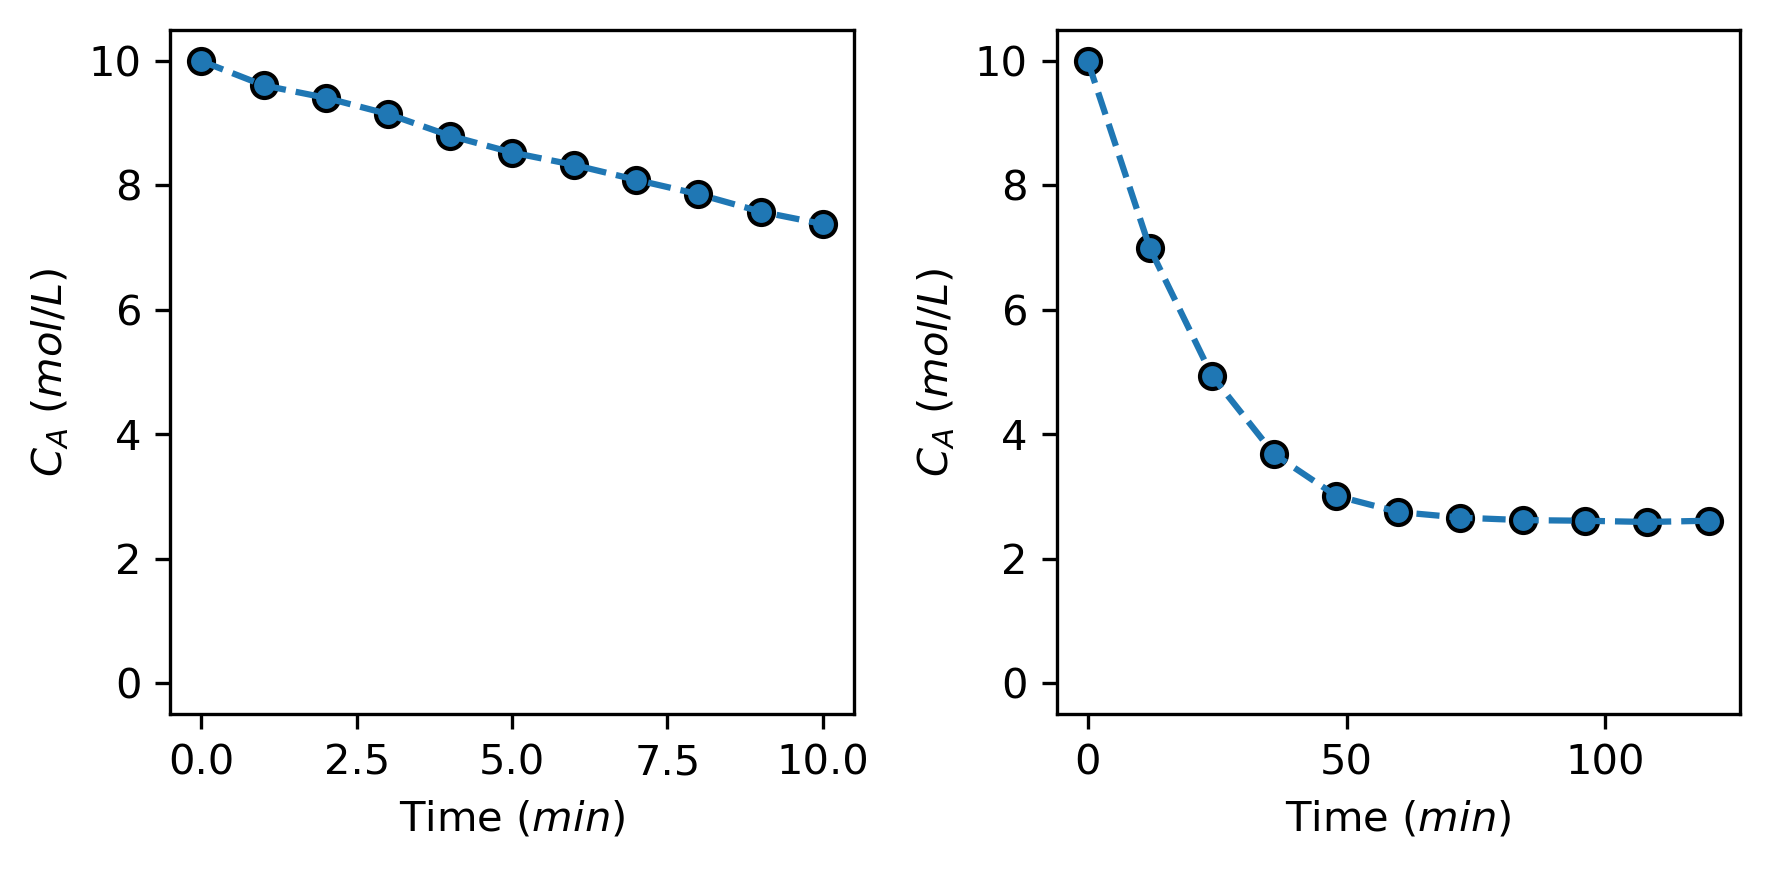

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t1  = np.array([0,1,2,3,4,5,6,7,8,9,10])
CA1 = np.array([10.00,9.61,9.41,9.15,8.8,8.53,8.33,8.09,7.86,7.58,7.38])

data1 = pd.DataFrame(t1,columns = ['Time (min)'])
data1[['C_A (mol/min)']] = pd.DataFrame(CA1)
data1.to_csv('expt1.csv')

t2  = np.array([0,12,24,36,48,60,72,84,96,108,120])
CA2 = np.array([10,6.99,4.94,3.68,3.01,2.75,2.66,2.62,2.61,2.59,2.61])

data2 = pd.DataFrame(t2,columns = ['Time (min)'])
data2[['C_A (mol/min)']] = pd.DataFrame(CA2)
data2.to_csv('expt2.csv')

### Plot data
fig = plt.figure(figsize=(6,3), dpi=300)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(t1,CA1,'--')
ax1.scatter(t1,CA1,marker='o',edgecolors= 'black')
ax1.set_xlabel(r'Time ($min$)')
ax1.set_ylabel(r'$C_A$ ($mol/L$)')
ax1.set_ylim([-0.5,10.5])

ax2.plot(t2,CA2,'--')
ax2.scatter(t2,CA2,marker='o',edgecolors= 'black')
ax2.set_xlabel(r'Time ($min$)')
ax2.set_ylabel(r'$C_A$ ($mol/L$)')
ax2.set_ylim([-0.5,10.5])

plt.tight_layout()
plt.show()

**Question 1:** Use these data to determine the equilibrium constant $K_C$ for this reaction.

**Question 2:** Use these data to develop a rate expression for this reaction of the form $r=k_f \cdot C_A^{n_A}\cdot(1-Q_C/K_C)$. It is up to you to choose a method to determine reliable parameters. *Hint: if you are careful you will not have to worry about the reversibility term for determining the rate constant and rate order.* *Note: this form of the rate expression is only rigorously correct for elementary steps, but it is also often correct for non-elementary steps as well; we will use it here without concern.*

**Question 3:** Use your model to predict the conversion you would achieve in a batch reactor with the following conditions and the parametrized rate expression you developed. **Provide this value in addition to a plot of all concentrations *vs* time.** *If you are having issues with the previous parts, use the following (incorrect) rate expression to receive partial credit: $r = 0.08 \cdot C_A^2 \cdot (1-Q_C/100)$.*

$C_{A,in} = 2.0 \ mol/L$ \
$C_{B,in} = C_{C,in} = 0 \ mol/L$ \
$V = 50 \ L$ \
$t_r = 60 \ min $ 

Text(0.5, 0, 'Time (min)')

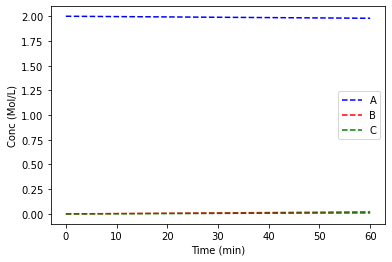

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

###### 2. Specify known values
Kc = 30
Kf = 5.43e-6
Ca0 = 2

###### 3. Initial conditions and integration span

### Initial conditions
A0 = 2
B0 = 0
C0 = 0 
U0 = [A0,B0,C0]

### Specify integration limits
tlim = (0,60)
tlist = np.linspace(tlim[0],tlim[1],num=60) # Not essential; prompts for 101 evenly-spaced points

###### 4. Differential equations
def diff(t,U): # t = independent variable, U = dependent variables
    
    ### Assign values to inputs if desired
    C_A = U[0]
    C_B = U[1]
    C_C = U[2]
   
    
    QC = ((C_B)**2)*(C_C)/(C_A)**2
    
    #rate calculations
    r = Kf*(C_A**5) * (1-QC/Kc)
    
    #formation rates
    R_A = -2*r
    R_B = 2*r 
    R_C = r 
    
    ### Series of calculations
    dA = R_A
    dB = R_B
    dC = R_C
    
    ### Define equations
    dU=np.zeros(len(U))
    dU[0] = dA
    dU[1] = dB
    dU[2] = dC
    
    ### Reorganize list to fit required dimensions 
    dU = np.array(dU).tolist()
    
    return dU

###### 5. Integrate
solution = solve_ivp(diff,tlim,U0,t_eval=tlist)

###### 6. Extract and use data
U = solution.y.T
t = solution.t
A = U[:,0]
B = U[:,1]
C = U[:,2]


### Plot data
#please note that the plot for a is commented out as it makes it difficult to see the change in B and C due to scaling
#to see more clearer scales on the plots, comment out either (A) or (B&C)
plt.plot(t,A,'b--')

plt.plot(t,B,'r--')

plt.plot(t,C,'g--')



plt.legend(['A','B','C','85% Conversion'])
plt.ylabel("Conc (Mol/L)")
plt.xlabel("Time (min)")

